# Getting Started with Gym

The **gym** library is a collection of test problems — _environments_ — that can be used to work out reinforcement learning algorithms. These environments have a shared interface, allowing you to write general algorithms.

To install gym, just run on your Terminal

```
pip install gym
```

Open AI Gym is an implementation of the classic “agent-environment loop”. Each timestep, the agent chooses an _action_, and the environment returns an _observation_ and a _reward_.

<img src="images/env-loop.PNG">


### Environments, actions and observations

Load the environment with ```gym```. 

This will run an instance of the the selected environment for some number of timesteps, rendering the environment at each step. In teh following example you should see a window pop up rendering the classic ```cart-pole``` problem with a random action.

In [18]:
import gym
env = gym.make('CartPole-v0')
env.reset()
for t in range(100):
    env.render()
    action = env.action_space.sample()# take a random action
    env.step(action)
env.close()

 The functions to explore the **environment** object are:

- ```env.observation_space```
- ```env.action_space ```
- ```env.reset()```: reset environment to initial state, return first observation
- ```env.render()```: show current environment state (a more colorful version :) )
- ```env.step(action)```: commit action and return (new observation, reward, is done, info)

### Observations

The environment’s ```step``` function returns four values:

* ```observation``` (object): an environment-specific object representing your observation of the environment. For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game.
* ```reward``` (float): amount of reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward.
* ```done``` (boolean): whether it’s time to reset the environment again. Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated. (For example, perhaps the pole tipped too far, or you lost your last life.)
* ```info``` (dict): diagnostic information useful for debugging. It can sometimes be useful for learning (for example, it might contain the raw probabilities behind the environment’s last state change). However, official evaluations of your agent are not allowed to use this for learning.


### Actions

Every environment comes with an ```action_space``` and an ```observation_space```. These attributes are of type ```Space```, and they describe the format of valid **actions** and **observations**:
The ```Discrete``` space allows a fixed range of non-negative numbers.
The ```Box``` space represents an n-dimensional box

## Example: CartPole

See more in https://towardsdatascience.com/reinforcement-learning-concept-on-cart-pole-with-dqn-799105ca670

![CartPole](https://gym.openai.com/videos/2019-10-21--mqt8Qj1mwo/CartPole-v1/poster.jpg)

The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

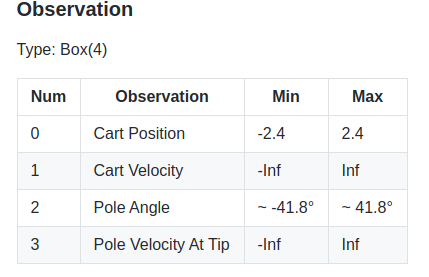

![Actions](https://miro.medium.com/max/2400/1*HNcp0AcTME4WRKqfoDc_dw.png)

In [20]:
import gym
env = gym.make('CartPole-v1')

print('observation space:', env.observation_space)
print('action space:', env.action_space)
print('initial observation:', env.reset())

observation space: Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
action space: Discrete(2)
initial observation: [ 0.03184767 -0.03879065  0.0215506   0.04234577]


In [21]:
action = env.action_space.sample()  # take a random action
print('action:', action)

obs, r, done, info = env.step(action)
print('next observation:', obs)
print('reward:', r)
print('done:', done)
print('info:', info)

action: 1
next observation: [ 0.03107186  0.15601575  0.02239752 -0.24346059]
reward: 1.0
done: False
info: {}


### Start working with the environment

In [23]:
env = gym.make('CartPole-v1')
env.reset()
for t in range(100):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print(observation)
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()

[ 0.00546104 -0.14586078 -0.0005824   0.25893152]
[ 0.00254382  0.04926948  0.00459623 -0.03393505]
[ 0.00352921  0.24432522  0.00391753 -0.32516428]
[ 0.00841572  0.43939117 -0.00258576 -0.61660922]
[ 0.01720354  0.24430544 -0.01491794 -0.32474181]
[ 0.02208965  0.04939904 -0.02141278 -0.03680046]
[ 0.02307763  0.24482141 -0.02214879 -0.33616168]
[ 0.02797406  0.44025144 -0.02887202 -0.63574605]
[ 0.03677909  0.24554382 -0.04158694 -0.35229353]
[ 0.04168996  0.44123172 -0.04863282 -0.65779462]
[ 0.0505146   0.24681923 -0.06178871 -0.3808131 ]
[ 0.05545098  0.44276166 -0.06940497 -0.69232019]
[ 0.06430621  0.63877438 -0.08325137 -1.00602009]
[ 0.0770817   0.44485688 -0.10337178 -0.74059889]
[ 0.08597884  0.64124257 -0.11818375 -1.06394214]
[ 0.09880369  0.83771364 -0.1394626  -1.39125819]
[ 0.11555796  1.03426943 -0.16728776 -1.7240985 ]
[ 0.13624335  0.84141048 -0.20176973 -1.48780208]
[ 0.15307156  1.03833673 -0.23152577 -1.83611763]
Episode finished after 19 timesteps


### Some simple policies

The basic simulation loop is:

```
state = env.reset()
while True:
    action = select_action(state)
    state, _, done, _ = env.step(action)
    env.render()
    if done:
        break
```

The environment will ```return done=True``` if either 500 timesteps have elapsed (episode success) or if the pole has fallen over (angular position of the pole has reached +- 12 degrees) or the cart has left the simulation space (cart position has reached +- 2.4), in which case the episode failed.

To make the above snippet work, we just have to supply a ```select_action()``` function, which given the state, returns what to do: move the cart left or right.

* **Random policy**

In [24]:
from random import random 

def select_action_random(state):
    if random() < 0.5:
        return 0
    else:
        return 1
 
env = gym.make('CartPole-v0')
state = env.reset()
while True:
    action = select_action_random(state)
    state, _, done, _ = env.step(action)
    env.render()
    if done:
        break
        
env.close()

* **Simple policy**: if the pole is falling to the right, let’s move the cart to the right to compensate, and vice versa:

In [26]:
def select_action_simple(state):
    if state[2] < 0:
        return 0
    else:
        return 1
 
env = gym.make('CartPole-v1')
state = env.reset()
while True:
    action = select_action_simple(state)
    state, _, done, _ = env.step(action)
    env.render()
    if done:
        break
        
env.close()

This policy should perform better than the random agent, but how much better? Let’s write a simple function which counts, on average, how far our agent survives (out of 500, as a ratio), and returns the average, a number between 0 and 1, 1 being a perfect score:

In [27]:
def goodness_score(select_action, num_episodes=100):
    num_steps = 500
    ts = []
    for episode in range(num_episodes):
        state = env.reset()
        for t in range(1, num_steps+1):
            action = select_action(state)
            state, _, done, _ = env.step(action)
            if done:
                break
        ts.append(t)
    score = sum(ts) / (len(ts)*num_steps)
    return score

If we run this for the above 2 test functions, like:

In [28]:
env = gym.make('CartPole-v1')

print(goodness_score(select_action_random))
print(goodness_score(select_action_simple))

0.04508
0.0858


We see that the random scores 0.04, and simple 0.08. So the simple is better than random, but still very far from 1. Let’s try something better: how about if we also add the angular velocity:

* **Policy** involving **position** of the top and the **angular velocity**.

In [29]:
def select_action_good(state):
    if state[2]+state[3] < 0:
        return 0
    else:
        return 1

In [30]:
env = gym.make('CartPole-v1')
state = env.reset()
while True:
    action = select_action_good(state)
    state, _, done, _ = env.step(action)
    env.render()
    if done:
        break
        
env.close()

In [15]:
env = gym.make('CartPole-v1')
goodness_score(select_action_good)

0.98388

Turns out this simple test function solves the problem pretty much perfectly, it gets a score of almost 1.0 (meaning the simulation survives all the way to 500 steps). We got lucky in this problem! 

* **Deep learning policy**

_Disclaimer: This part of teh code is to take a look of how a deep learning policy looks like, we will go through later._

Let's build a neural network which will try to guess/learn the ```select_state()``` function above.

The input state is 4 doubles, and the output is 2 doubles (the probability of going left and right, sum to 1). Since we got lucky above with ```select_action_good()```, we know a small neural network will do, it just has to learn to add the right components:

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from   torch.distributions import Categorical

class PolicyNN(nn.Module):
    def __init__(self):
        super(PolicyNN, self).__init__()
        self.fc = nn.Linear(4, 2)

    def forward(self, x):
        x = self.fc(x)
        return F.softmax(x, dim=1)

The ```select_action()``` that goes along with the network is:

In [44]:
def select_action_from_policy(model, state):
    state = torch.from_numpy(state).float().unsqueeze(0)
    probs = model(state)
    m = Categorical(probs)
    action = m.sample()
    return action.item(), m.log_prob(action)

def select_action_from_policy_best(model, state):
    state = torch.from_numpy(state).float().unsqueeze(0)
    probs = model(state)
    if probs[0][0] > probs[0][1]:
        return 0
    else:
        return 1

In [45]:
model_untrained = PolicyNN()

print(
    goodness_score(lambda state: select_action_from_policy(model_untrained, state)[0]),
    goodness_score(lambda state: select_action_from_policy_best(model_untrained, state))
)


0.03244 0.01858


The next question is, how do we train our network? In supervised learning, we train our network on independent samples, and for each sample, we know what the desired response is, and construct a loss function (from some sort of distance-like metric) from that. Here, there is no explicit training data to tell us whether in a given state a right/left prediction was good or bad. But it's actually not that hard to constuct a loss function.

Taking a step back, what is our goal in the CartPole environment? The goal is that the agent should survive as long as possible, 500 steps in this simulation. So as a first idea, we could simply try to use the ```(1 - t/500)``` normalized length of the simulation (how far the agent got) as a loss function. Then we can use gradient descent to search for a minimum of the loss function (maximum length of simulation). 
However, this won't work. The problem is, ```t``` is a book keeping int variable, it's not a Pytorch variable. It's not derived from (not a function of) the neural network's output, so we can't take the derivative of it (with respect ```t``` or the network's weights).
But from the above idea, we can get something that works. At each timestep, let's say that the reward is how long the simulation survived after the timestep, multiplied by the network's output that we took (left/right probability). The loss is the negative sum of all rewards. This sounds good, because: (i) the global minimum of the this loss will be when the agent survives all the way, and takes the moves that lead there with 1 probability (ii) it's a function of the network's outputs (the probabilities).

In [47]:
model = PolicyNN()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train_simple(num_episodes=10*1000):
    num_steps = 500
    ts = []
    for episode in range(num_episodes):
        state = env.reset()
        probs = []
        for t in range(1, num_steps+1):
            action, prob = select_action_from_policy(model, state)
            probs.append(prob)
            state, _, done, _ = env.step(action)
            if done:
                break
        # loss = 1.0 - t / num_steps
        # this doesn't actually work, because
        # the loss function is not an explicit
        # function of the model's output; it's
        # a function of book keeping variables
        loss = 0
        for i, prob in enumerate(probs):
            loss += -1 * (t - i) * prob
        #print(episode, t, loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ts.append(t)
        # check stopping condition:
        if len(ts) > 10 and sum(ts[-10:])/10.0 >= num_steps * 0.95:
            print('Stopping training, looks good...')
            return
env = gym.make('CartPole-v1')
train_simple()

Stopping training, looks good...


In [36]:
print(
    goodness_score(lambda state: select_action_from_policy(model, state)[0]),
    goodness_score(lambda state: select_action_from_policy_best(model, state))
)

0.85808 1.0


In [49]:
env = gym.make('CartPole-v0')
state = env.reset()
while True:
    action = select_action_from_policy_best(model, state)
    state, _, done, _ = env.step(action)
    env.render()
    if done:
        break
        
env.close()